In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 파일 불러오기

In [33]:
df = pd.read_excel('대여소별 대여내역(2017년).xlsx')
frame = pd.read_excel('대여소별 대여내역(2017년).xlsx')

## 대여소 전반적인 정보 분석하기

In [3]:
df.head()

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
0,그룹명 없음,대여소명 없음,2017-01-01,0
1,광진구,500. 어린이대공원역 3번출구 앞,2017-01-01,20
2,광진구,501. 광진구의회 앞,2017-01-01,10
3,광진구,502. 뚝섬유원지역 1번출구 앞,2017-01-01,9
4,광진구,503. 더샵스타시티 C동 앞,2017-01-01,9


- 그룹명 없음, 대여소명 없음과 같은 의미없는 정보가 포함되어 있음

In [4]:
df.tail()

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
245441,중랑구,1442. (구)신한은행 중랑교지점,2017-12-31,3
245442,중랑구,1445. 용마지구대,2017-12-31,1
245443,중랑구,1446. 중랑전화국 교차로,2017-12-31,3
245444,중랑구,1447. 면목역 3번출구,2017-12-31,1
245445,중랑구,1448. 코스트코 상봉점,2017-12-31,10


In [6]:
df.shape

(245446, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245446 entries, 0 to 245445
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   대여소 그룹     245446 non-null  object        
 1   대여소 명      245446 non-null  object        
 2   대여 일자 / 월  245446 non-null  datetime64[ns]
 3   대여 건수      245446 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.5+ MB


In [8]:
df.isnull()

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
245441,False,False,False,False
245442,False,False,False,False
245443,False,False,False,False
245444,False,False,False,False


In [10]:
df.isnull().sum()

대여소 그룹       0
대여소 명        0
대여 일자 / 월    0
대여 건수        0
dtype: int64

- 결측치를 찍어봤는데 결측치는 존재하지 않음

In [13]:
df["대여소 그룹"]

0         그룹명 없음
1            광진구
2            광진구
3            광진구
4            광진구
           ...  
245441       중랑구
245442       중랑구
245443       중랑구
245444       중랑구
245445       중랑구
Name: 대여소 그룹, Length: 245446, dtype: object

- 하지만 그룹명 없음과 같은 의미없는 컬럼을 없애야 함

In [14]:
df["대여소 명"]

0                     대여소명 없음
1         500. 어린이대공원역 3번출구 앞
2                501. 광진구의회 앞
3          502. 뚝섬유원지역 1번출구 앞
4            503. 더샵스타시티 C동 앞
                 ...         
245441    1442. (구)신한은행 중랑교지점
245442            1445. 용마지구대
245443        1446. 중랑전화국 교차로
245444         1447. 면목역 3번출구
245445         1448. 코스트코 상봉점
Name: 대여소 명, Length: 245446, dtype: object

In [32]:
df[df["대여소 그룹"] == "그룹명 없음"].sum()

대여소 그룹    그룹명 없음그룹명 없음그룹명 없음그룹명 없음그룹명 없음그룹명 없음그룹명 없음그룹명 ...
대여소 명     대여소명 없음대여소명 없음대여소명 없음대여소명 없음대여소명 없음대여소명 없음대여소명...
대여 건수                                                   765
dtype: object

In [35]:
df["대여소 그룹"] = df["대여소 그룹"].replace("그룹명 없음",np.nan)
frame["대여소 그룹"] = frame["대여소 그룹"].replace("그룹명 없음",np.nan)

In [36]:
df.dropna(inplace=True)
frame.dropna(inplace=True)

- "그룹명 없음"과 같은 것들을 np.nan으로 바꾼뒤 na값들을 없앤다

In [42]:
df[df["대여소 그룹"] == np.nan].sum()

대여소 그룹    0.0
대여소 명     0.0
대여 건수     0.0
dtype: float64

In [43]:
df.head()

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
1,광진구,500. 어린이대공원역 3번출구 앞,2017-01-01,20
2,광진구,501. 광진구의회 앞,2017-01-01,10
3,광진구,502. 뚝섬유원지역 1번출구 앞,2017-01-01,9
4,광진구,503. 더샵스타시티 C동 앞,2017-01-01,9
5,광진구,504. 신자초교입구교차로,2017-01-01,6


In [45]:
df["대여 건수"].astype(int)

1         20
2         10
3          9
4          9
5          6
          ..
245441     3
245442     1
245443     3
245444     1
245445    10
Name: 대여 건수, Length: 244630, dtype: int32

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244630 entries, 1 to 245445
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   대여소 그룹     244630 non-null  object        
 1   대여소 명      244630 non-null  object        
 2   대여 일자 / 월  244630 non-null  datetime64[ns]
 3   대여 건수      244630 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 9.3+ MB


In [47]:
df["대여 건수"].max()

581

In [48]:
df["대여 건수"].min()

0

In [49]:
df["대여 건수"].describe()

count    244630.000000
mean         20.562752
std          22.251255
min           0.000000
25%           6.000000
50%          14.000000
75%          28.000000
max         581.000000
Name: 대여 건수, dtype: float64

In [51]:
# 유일한 값 찾기
df["대여소 그룹"].unique()

array(['광진구', '동대문구', '마포구', '서대문구', '성동구', '양천구', '영등포구', '용산구', '은평구',
       '종로구', '중구', '강동구', '강서구', '송파구', '성북구', '중랑구', '강북구', '노원구',
       '도봉구', '금천구', '구로구', '관악구', '동작구', '서초구', '강남구'], dtype=object)

In [60]:
# 유일한 값별 개수 세기
df["대여소 그룹"].value_counts()

영등포구    24849
마포구     24759
성동구     17837
종로구     17726
서대문구    16217
동대문구    13288
광진구     11588
중구      11537
은평구     10771
강남구      9259
서초구      9257
강서구      8430
송파구      7928
용산구      7717
중랑구      6645
양천구      6001
관악구      5580
강동구      5482
구로구      5419
성북구      4821
동작구      4789
노원구      4788
금천구      4701
강북구      3473
도봉구      1768
Name: 대여소 그룹, dtype: int64

## 1. 대여소 그룹 별 대여 건수

In [59]:
df.groupby("대여소 그룹")["대여 건수"].mean()

대여소 그룹
강남구     13.780430
강동구     14.304816
강북구      8.934063
강서구     13.734994
관악구     19.355735
광진구     26.441750
구로구     15.246540
금천구      7.616039
노원구     18.446115
도봉구     11.230204
동대문구    18.185807
동작구     19.885989
마포구     31.568076
서대문구    19.140162
서초구     15.322567
성동구     21.139597
성북구     15.475835
송파구     20.248234
양천구     12.371605
영등포구    26.310475
용산구     18.182973
은평구     17.145483
종로구     27.493061
중구      20.860536
중랑구     10.906546
Name: 대여 건수, dtype: float64

In [61]:
df.groupby("대여소 그룹")["대여 건수"].describe()

,count,mean,std,min,25%,50%,75%,max
대여소 그룹,,,,,,,,
강남구,9259.0,13.780430,12.540832,0.0,5.0,11.0,19.0,144.0
강동구,5482.0,14.304816,12.524901,0.0,5.0,11.0,21.0,87.0
강북구,3473.0,8.934063,8.848148,0.0,3.0,6.0,13.0,67.0
강서구,8430.0,13.734994,12.876048,0.0,5.0,10.0,19.0,115.0
관악구,5580.0,19.355735,21.678230,0.0,6.0,13.0,25.0,224.0
광진구,11588.0,26.441750,32.057739,0.0,7.0,17.0,35.0,490.0
구로구,5419.0,15.246540,18.796488,0.0,4.0,10.0,19.0,213.0
금천구,4701.0,7.616039,7.334238,0.0,2.0,6.0,11.0,88.0
노원구,4788.0,18.446115,18.379373,0.0,4.0,12.0,28.0,144.0


In [62]:
pd.pivot_table(df, index="대여소 그룹", values="대여 건수")

,대여 건수
대여소 그룹,
강남구,13.780430
강동구,14.304816
강북구,8.934063
강서구,13.734994
관악구,19.355735
광진구,26.441750
구로구,15.246540
금천구,7.616039
노원구,18.446115


In [9]:
plt.rc("font", family="Malgun Gothic")

In [64]:
# 대여소 그룹병 대여 건수 평균 그래프 
# df.groupby("대여소 그룹")["대여 건수"].mean() 
info1 = pd.pivot_table(df, index="대여소 그룹", values="대여 건수")

<AxesSubplot:xlabel='대여소 그룹'>

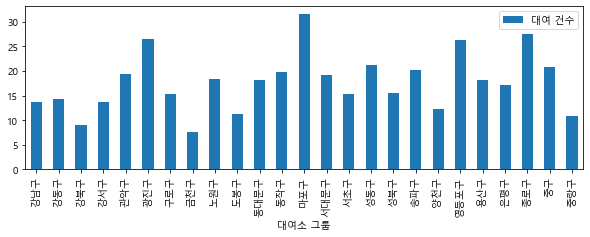

In [70]:
info1.plot(kind='bar', figsize=(10, 3))

<AxesSubplot:xlabel='대여소 그룹', ylabel='대여 건수'>

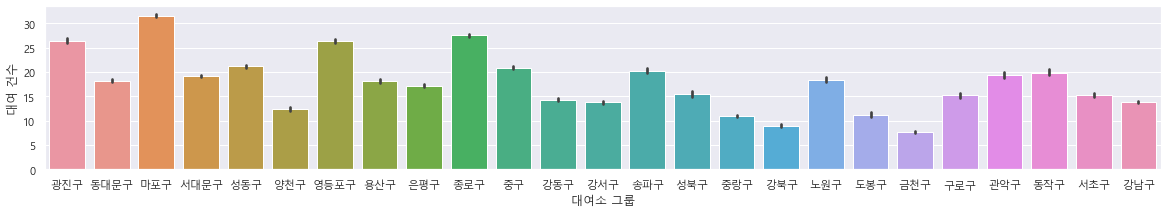

In [80]:
plt.figure(figsize = (20,3))
sns.barplot(data=df, x="대여소 그룹", y="대여 건수")

In [84]:
# 대여소 그룹에 대한 전체 대여 건수
info1_sum = df.groupby("대여소 그룹")["대여 건수"].sum()

<AxesSubplot:xlabel='대여소 그룹'>

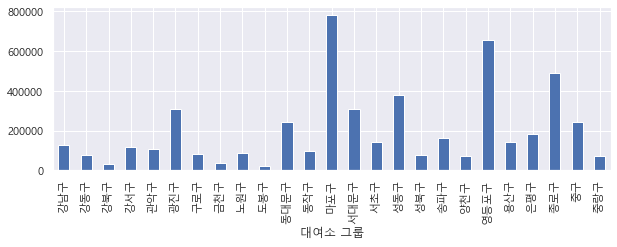

In [85]:
info1_sum.plot(kind='bar', figsize=(10, 3))

## 2. 월별에 따른 대여 건수

In [97]:
pd.pivot_table(df, index="대여 일자 / 월", values="대여 건수")

,대여 건수
대여 일자 / 월,
2017-01-01,5.327945
2017-01-02,8.607710
2017-01-03,9.244292
2017-01-04,10.530612
2017-01-05,10.297483
...,...
2017-12-27,5.983316
2017-12-28,7.163121
2017-12-29,8.303518


In [37]:
frame['대여 일자 / 월']=pd.to_datetime(frame['대여 일자 / 월']).dt.month

In [38]:
frame.head()

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
1,광진구,500. 어린이대공원역 3번출구 앞,1,20
2,광진구,501. 광진구의회 앞,1,10
3,광진구,502. 뚝섬유원지역 1번출구 앞,1,9
4,광진구,503. 더샵스타시티 C동 앞,1,9
5,광진구,504. 신자초교입구교차로,1,6


<AxesSubplot:xlabel='대여 일자 / 월', ylabel='대여 건수'>

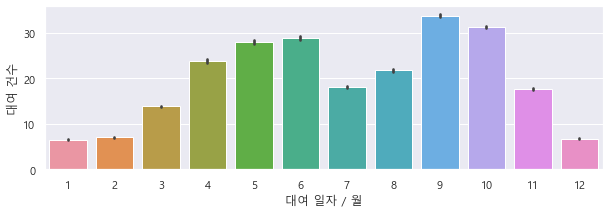

In [175]:
sns.barplot(data=frame, x='대여 일자 / 월', y="대여 건수")

<AxesSubplot:xlabel='대여 일자 / 월', ylabel='대여 건수'>

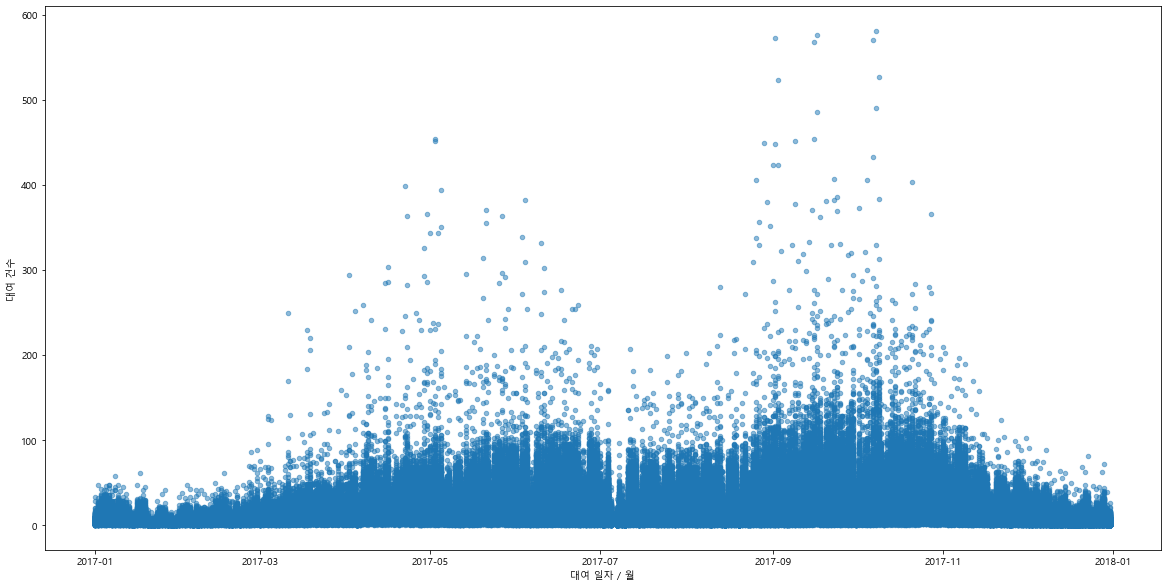

In [30]:
df.plot(kind='scatter',x = '대여 일자 / 월' ,y = "대여 건수", figsize=(20, 10), alpha=0.5)

frame_group = frame.groupby("대여 일자 / 월")["대여 건수"].mean()
frame_group.plot(kind="pie",
    figsize=(30,20),
    startangle = 10,
    colors=["chocolate", "bisque", "cadetblue"],
    autopct = "%1.1f%%",
    title = '대여 일자 / 월별 대여 건수', 
    fontsize = 20)

## 3. (각각 월에)일에 따른 대여건수

In [134]:
info2 = pd.pivot_table(df, index="대여 일자 / 월", values="대여 건수")

In [136]:
ja = info2[info2.index.isin(pd.date_range("2017-01-01", "2017-01-31"))]
fa = info2[info2.index.isin(pd.date_range("2017-02-01", "2017-02-28"))]
ma = info2[info2.index.isin(pd.date_range("2017-03-01", "2017-03-31"))]
ap = info2[info2.index.isin(pd.date_range("2017-04-01", "2017-04-30"))]
ma = info2[info2.index.isin(pd.date_range("2017-05-01", "2017-05-31"))]
jun = info2[info2.index.isin(pd.date_range("2017-06-01", "2017-06-30"))]
jul = info2[info2.index.isin(pd.date_range("2017-07-01", "2017-07-31"))]
aug = info2[info2.index.isin(pd.date_range("2017-08-01", "2017-08-31"))]
sep = info2[info2.index.isin(pd.date_range("2017-09-01", "2017-09-30"))]
oc = info2[info2.index.isin(pd.date_range("2017-10-01", "2017-10-31"))]
no = info2[info2.index.isin(pd.date_range("2017-11-01", "2017-11-30"))]
de = info2[info2.index.isin(pd.date_range("2017-12-01", "2017-12-31"))]

<AxesSubplot:xlabel='대여 일자 / 월'>

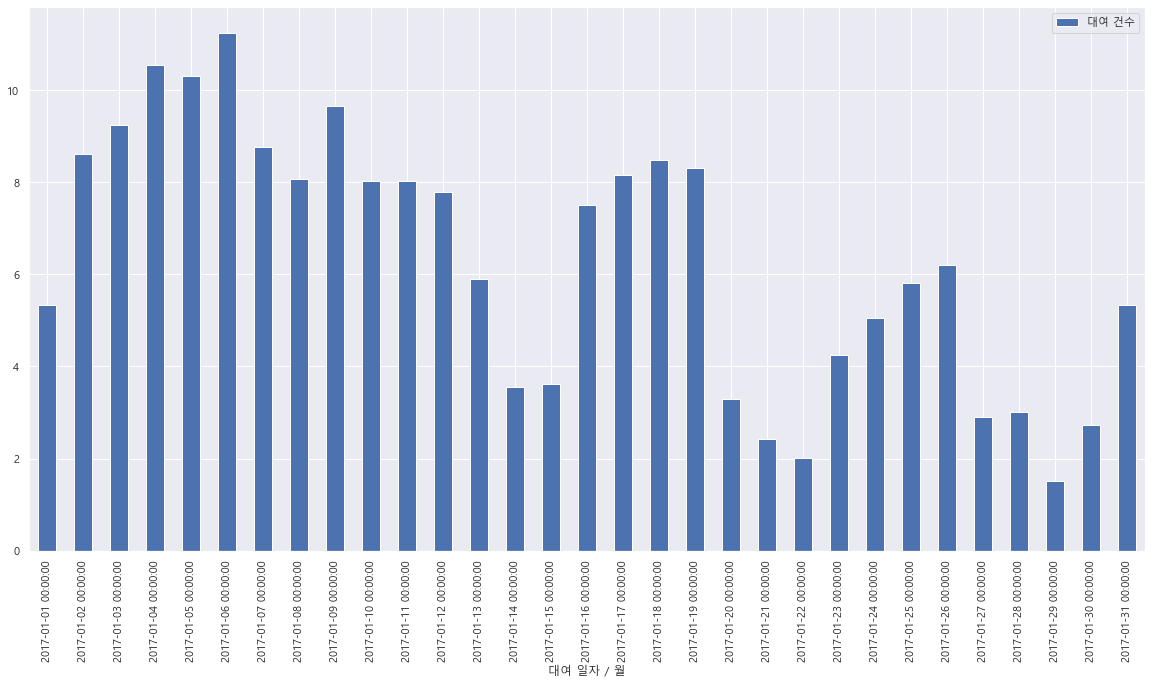

In [141]:
ja.plot(kind='bar', figsize=(20, 10))

<AxesSubplot:xlabel='대여 일자 / 월'>

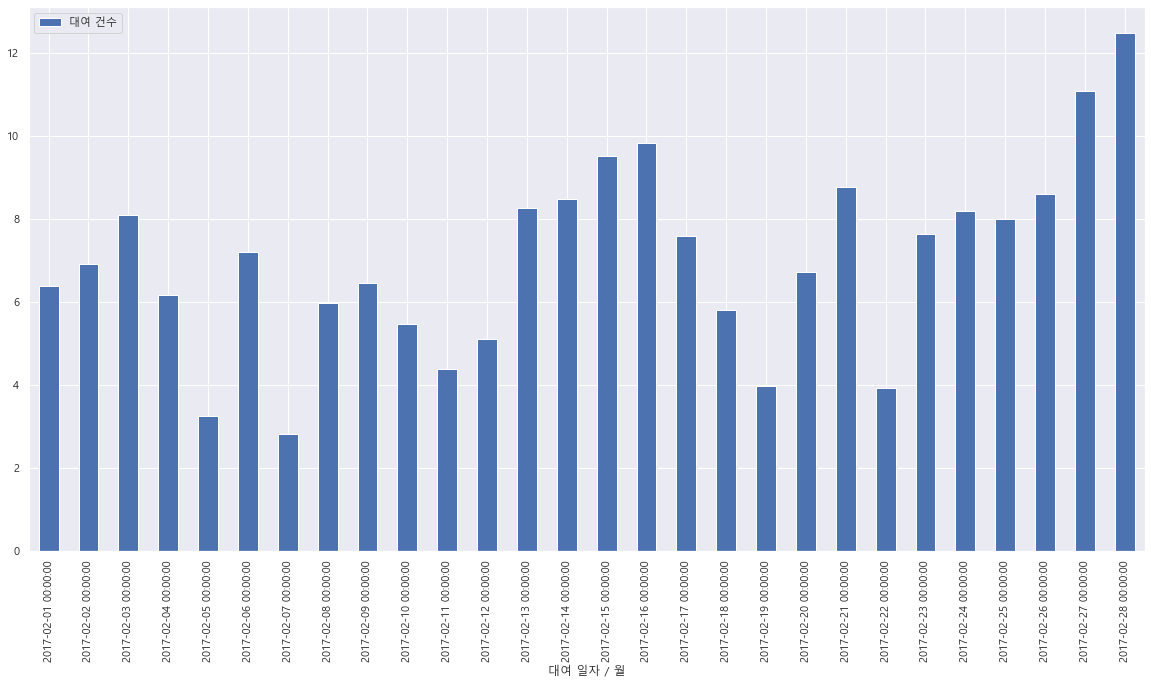

In [149]:
fa.plot(kind='bar', figsize=(20, 10))

<AxesSubplot:xlabel='대여 일자 / 월'>

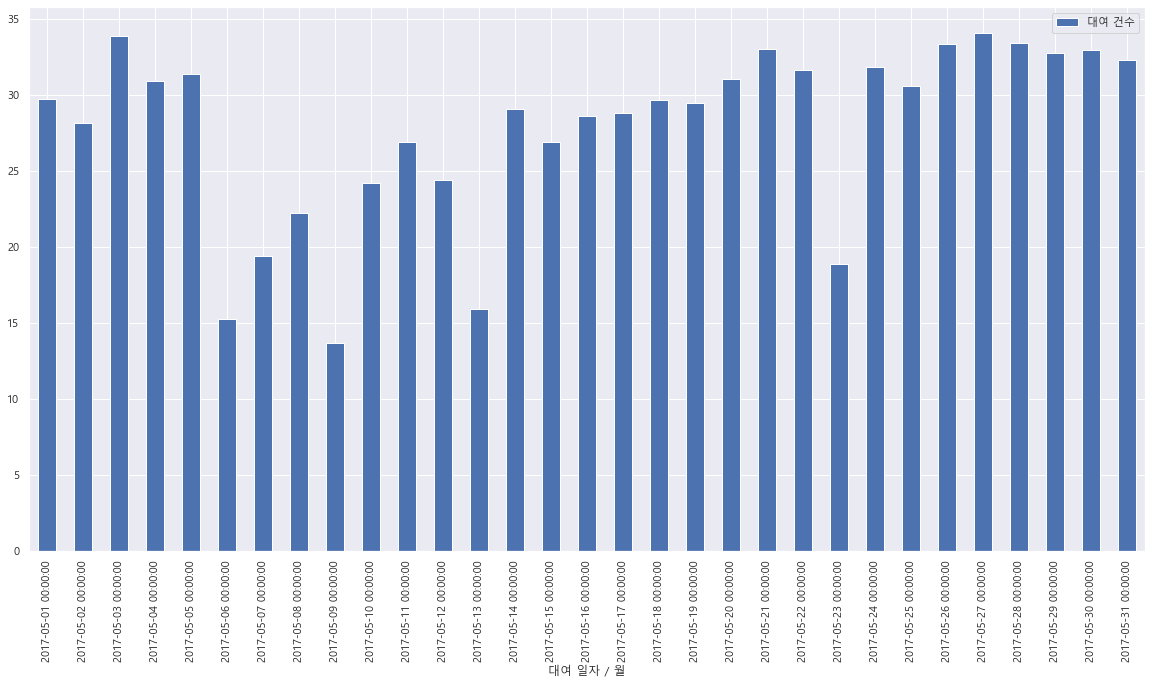

In [150]:
ma.plot(kind='bar', figsize=(20, 10))

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244630 entries, 1 to 245445
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   대여소 그룹     244630 non-null  object        
 1   대여소 명      244630 non-null  object        
 2   대여 일자 / 월  244630 non-null  datetime64[ns]
 3   대여 건수      244630 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 17.4+ MB


## 4. 상황에 따른 검색법

In [31]:
gz = df[df["대여소 그룹"] == "광진구"]

<AxesSubplot:xlabel='대여 일자 / 월', ylabel='대여 건수'>

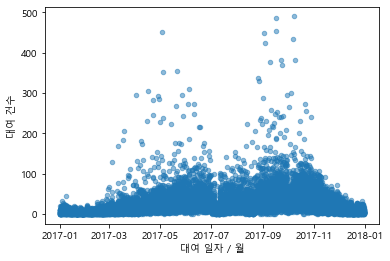

In [32]:
# 광진구 기준 1월 ~ 12월 사이의 대여 건수
gz.plot(kind="scatter", x = "대여 일자 / 월", y = "대여 건수", alpha=0.5)

In [176]:
gz_sns = frame[frame["대여소 그룹"] == "광진구"]

<AxesSubplot:xlabel='대여 일자 / 월', ylabel='대여 건수'>

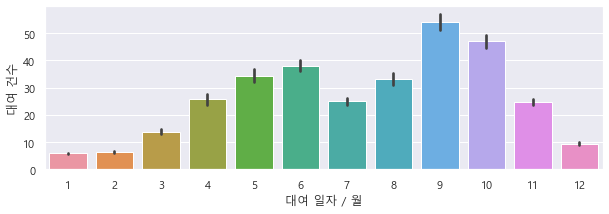

In [177]:
sns.barplot(data=gz_sns, x="대여 일자 / 월", y="대여 건수")

<AxesSubplot:xlabel='대여 일자 / 월', ylabel='대여 건수'>

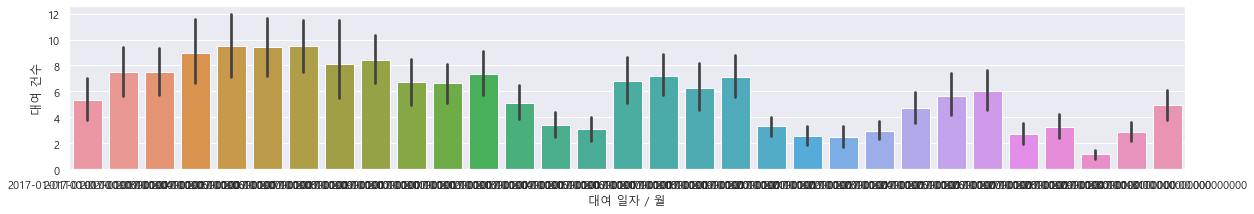

In [165]:
# 광진구에서 1월 1일 ~ 1월 31일 까지의 대여 건수

gz_ja = gz[gz["대여 일자 / 월"].isin(pd.date_range("2017-01-01", "2017-01-31"))]
plt.figure(figsize = (20,3))
sns.barplot(data=gz_ja, x="대여 일자 / 월", y="대여 건수")

-----

## 추가

In [19]:
import copy

In [16]:
df_rental = pd.read_excel("대여소별 대여내역(2017년).xlsx")
df_return = pd.read_excel("대여소별 반납내역(2017년).xlsx")

In [17]:
#데이터 전처리
df_rental = df_rental.drop(df_rental[df_rental['대여소 그룹'] == '그룹명 없음'].index)
df_return = df_return.drop(df_return[df_return['대여소 그룹'] == '그룹명 없음'].index)

In [20]:
tmp_dataframe1 = copy.copy(df_rental)
tmp_dataframe1['날짜_년'] = pd.to_datetime(df_rental['대여 일자 / 월']).dt.year
tmp_dataframe1['날짜_월'] = pd.to_datetime(df_rental['대여 일자 / 월']).dt.month
tmp_dataframe1['날짜_일'] = pd.to_datetime(df_rental['대여 일자 / 월']).dt.day
tmp_dataframe1['날짜_요일'] = pd.to_datetime(df_rental['대여 일자 / 월']).dt.day_name()
tmp_dataframe1 = tmp_dataframe1.drop(['대여 일자 / 월'], axis='columns')

tmp_dataframe2= copy.copy(df_return)
tmp_dataframe2['날짜_년'] = pd.to_datetime(df_return['반납 일자 / 월']).dt.year
tmp_dataframe2['날짜_월'] = pd.to_datetime(df_return['반납 일자 / 월']).dt.month
tmp_dataframe2['날짜_일'] = pd.to_datetime(df_return['반납 일자 / 월']).dt.day
tmp_dataframe2['날짜_요일'] = pd.to_datetime(df_return['반납 일자 / 월']).dt.day_name()
tmp_dataframe2 = tmp_dataframe2.drop(['반납 일자 / 월'], axis='columns')

tmp_dataframe2

,대여소 그룹,대여소 명,반납 건수,날짜_년,날짜_월,날짜_일,날짜_요일
1,광진구,500. 어린이대공원역 3번출구 앞,12,2017,1,1,Sunday
2,광진구,501. 광진구의회 앞,10,2017,1,1,Sunday
3,광진구,502. 뚝섬유원지역 1번출구 앞,13,2017,1,1,Sunday
4,광진구,503. 더샵스타시티 C동 앞,8,2017,1,1,Sunday
5,광진구,504. 신자초교입구교차로,13,2017,1,1,Sunday
...,...,...,...,...,...,...,...
245441,중랑구,1442. (구)신한은행 중랑교지점,1,2017,12,31,Sunday
245442,중랑구,1445. 용마지구대,0,2017,12,31,Sunday
245443,중랑구,1446. 중랑전화국 교차로,2,2017,12,31,Sunday
245444,중랑구,1447. 면목역 3번출구,2,2017,12,31,Sunday


<AxesSubplot:ylabel='반납 건수'>

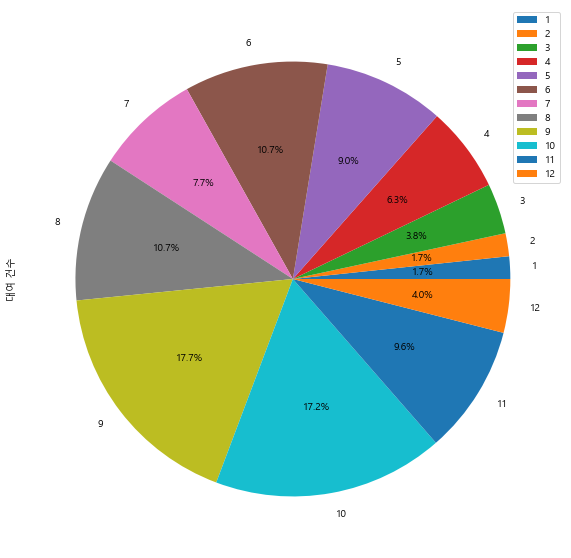

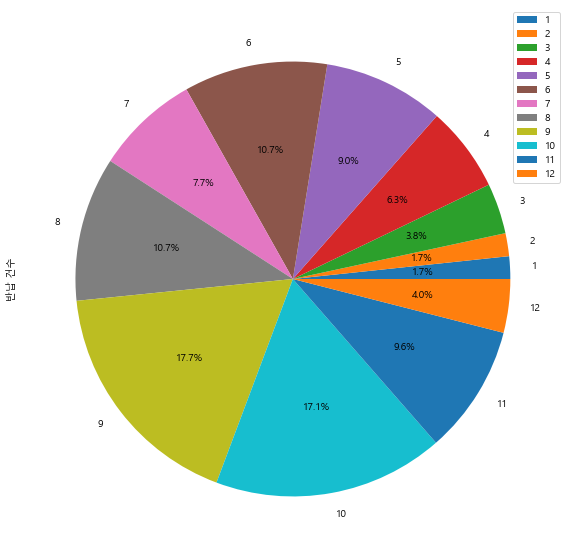

In [21]:
tmp_dataframe1.groupby('날짜_월').sum().plot(kind='pie', figsize = (15,10), y='대여 건수', autopct='%1.1f%%')
tmp_dataframe2.groupby('날짜_월').sum().plot(kind='pie', figsize = (15,10), y='반납 건수', autopct='%1.1f%%')

<AxesSubplot:ylabel='반납 건수'>

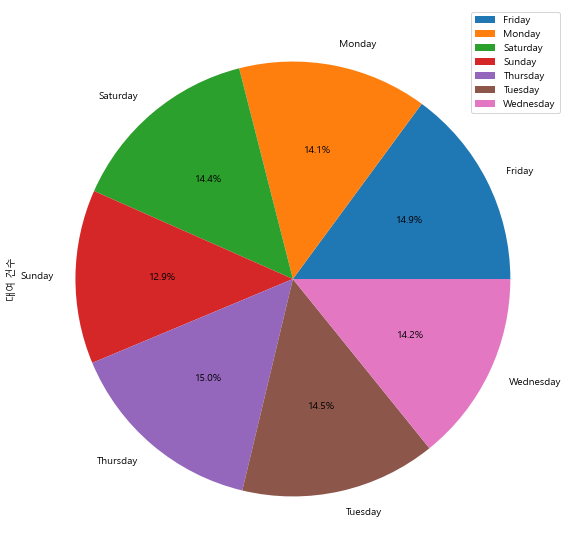

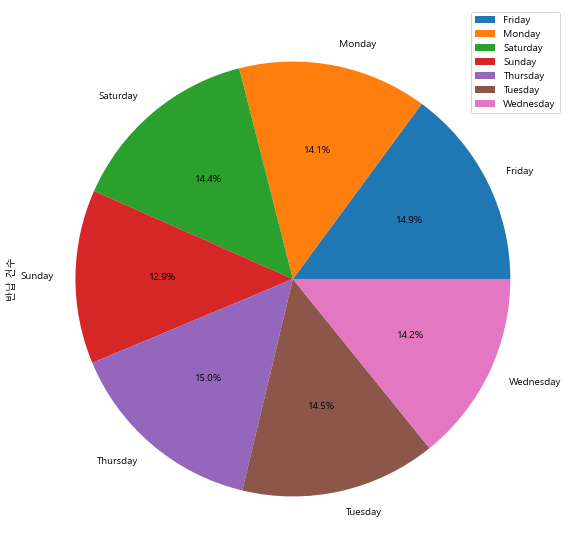

In [22]:
tmp_dataframe1.groupby('날짜_요일').sum().plot(kind='pie', figsize = (15,10), y='대여 건수', autopct='%1.1f%%')
tmp_dataframe2.groupby('날짜_요일').sum().plot(kind='pie', figsize = (15,10), y='반납 건수', autopct='%1.1f%%')

<AxesSubplot:ylabel='반납 건수'>

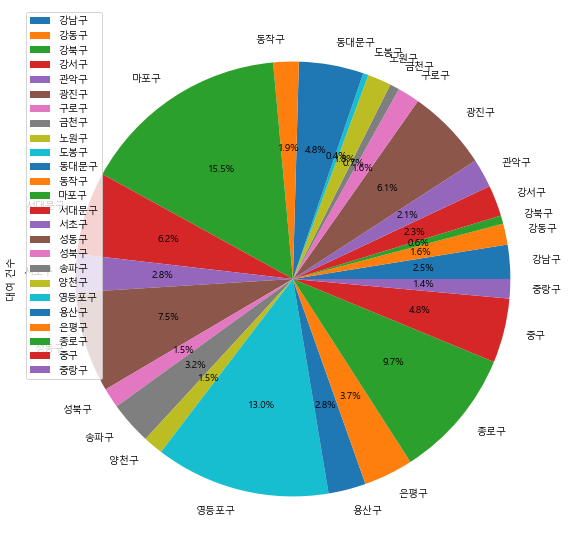

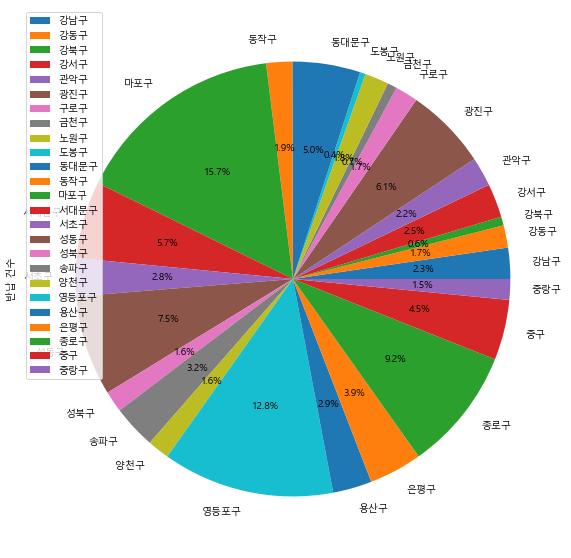

In [23]:
tmp_dataframe1.groupby('대여소 그룹').sum().plot(kind='pie', figsize = (15,10), y='대여 건수', autopct='%1.1f%%')
tmp_dataframe2.groupby('대여소 그룹').sum().plot(kind='pie', figsize = (15,10), y='반납 건수', autopct='%1.1f%%')

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

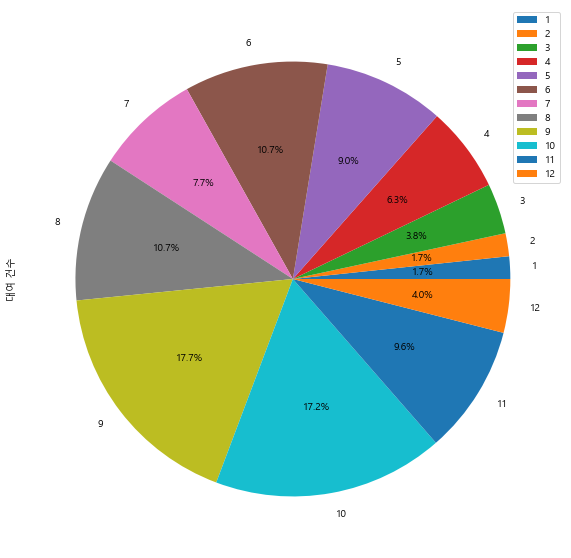

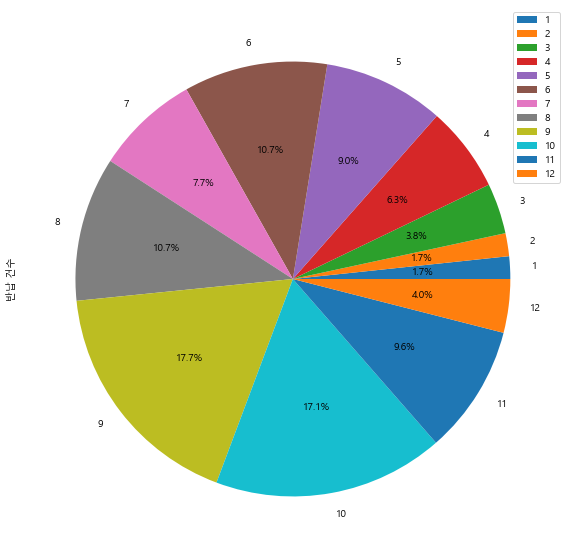

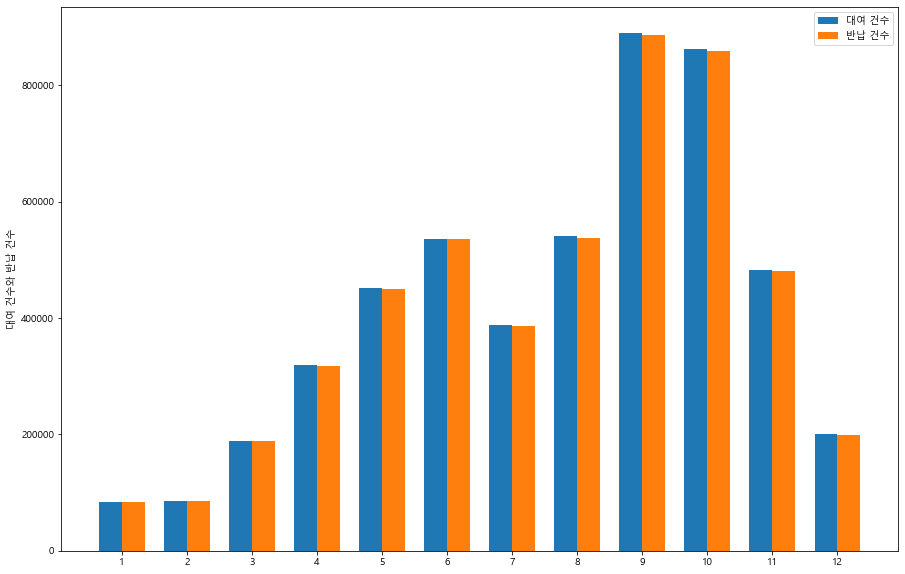

In [24]:
tmp1 = tmp_dataframe1.groupby('날짜_월').sum()
tmp2 = tmp_dataframe2.groupby('날짜_월').sum()

tmp_dataframe1.groupby('날짜_월').sum().plot(kind='pie', figsize = (15,10), y='대여 건수', autopct='%1.1f%%')
tmp_dataframe2.groupby('날짜_월').sum().plot(kind='pie', figsize = (15,10), y='반납 건수', autopct='%1.1f%%')

x = np.arange(tmp1.shape[0]) 
width = 0.35
labels = [i+1 for i in range(12)]

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, tmp1['대여 건수'], width, label='대여 건수')
rects2 = ax.bar(x + width/2, tmp2['반납 건수'], width, label='반납 건수')

ax.set_ylabel('대여 건수와 반납 건수')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()